In [ ]:
#@title Laplace Model Inversions

# Setup

In [2]:

#@markdown Basic imports

import sys
print(sys.version)

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import importlib  # for reloading imports to source functions
from IPython.display import HTML



3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


In [3]:
#@markdown Mount google drive and import my code

from google.colab import drive
drive.mount('/content/drive')
new_path = "/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src"
if new_path not in sys.path:
  sys.path.insert(0,new_path)

#from src.euler_inversion import euler_inversion
#from src import plotting
#from src import viscoporoelastic_model
#from src.viscoporoelastic_model import ViscoporoelasticModel
from euler_inversion import euler_inversion
import plotting
import viscoporoelastic_model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Simple Laplace Model Inversion

Time taken in sec: 0.008980751037597656


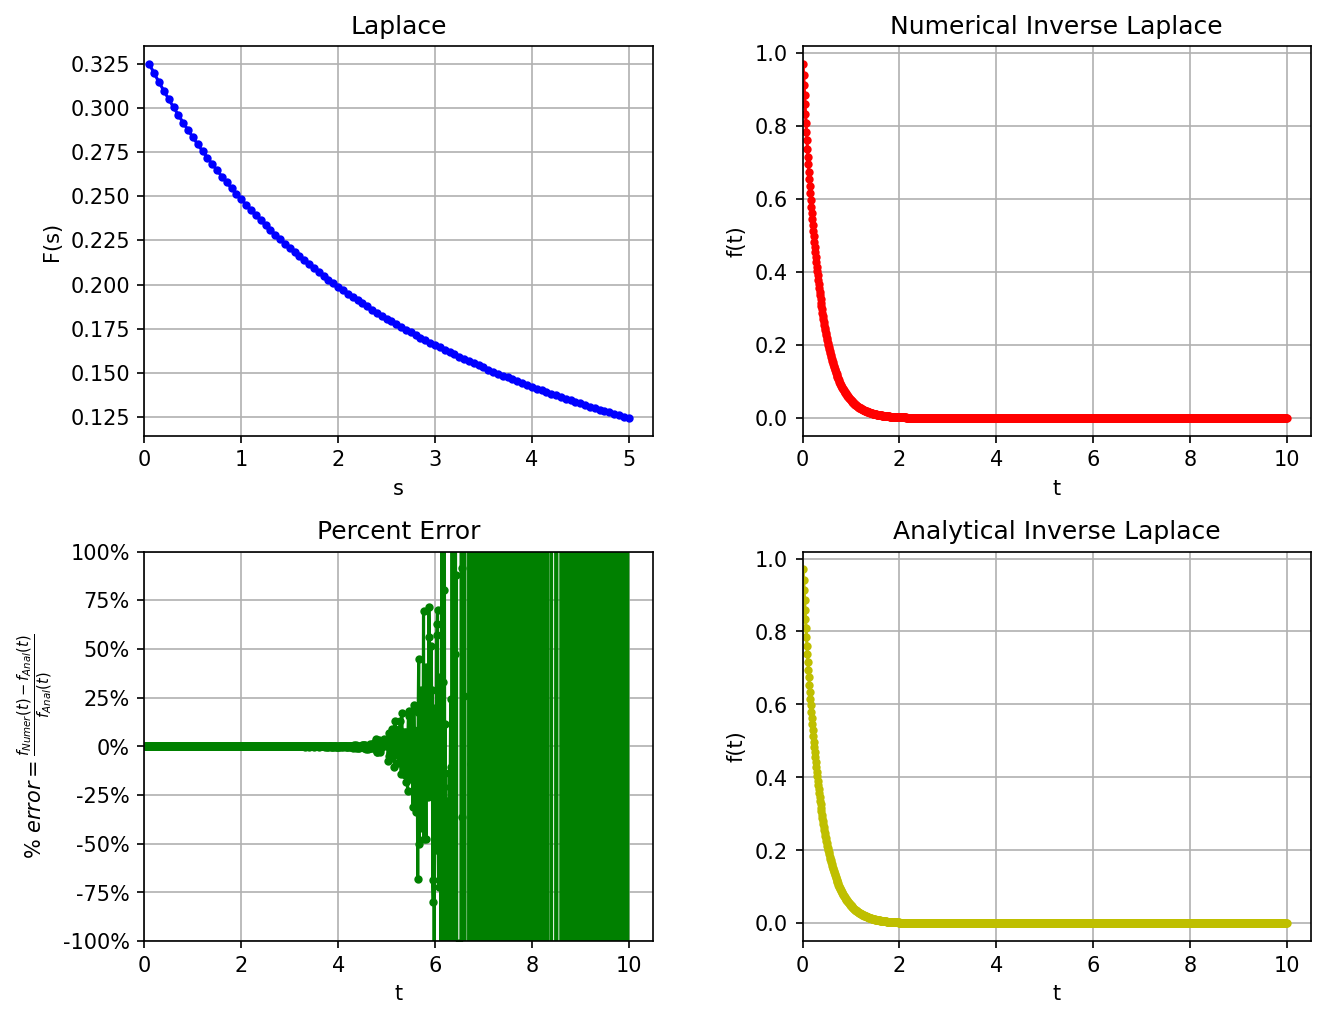

In [4]:
#@markdown Simple Laplace - Numerical Inversion

anal_offset = 1
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.arange(0.1,100,0.1)/10000.0*10*anal_offset
times=np.arange(0.1,100,0.1)/100.0*10*anal_offset

a=-3.03
#func = lambda s: 1/(s-a)
func = lambda s: 1/(s-a)
inv_func_anal = lambda t: np.exp(a*t)

input_times = times
plot_times  = times
func_name = {"t":"f(t)", "s":"F(s)"}
x_names   = {"t":"t", "s":"s"}
s_vals = np.arange(0.05, 5.05, 0.05)
input_times_anal = input_times /anal_offset
plot_times_anal = plot_times /anal_offset


fig=plotting.plot_laplace_analysis(func=func, func_name=func_name, tg=1, x_names=x_names, s_vals=s_vals, input_times=input_times, plot_times=plot_times, input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, inv_func_anal=inv_func_anal )


# Key Points from Prior Paper
Yuan, D., Somers, S.M., Grayson, W.L. et al. A Poroelastic Model of a Fibrous-Porous Tissue Engineering Scaffold. Sci Rep 8, 5043 (2018). https://doi.org/10.1038/s41598-018-23214-8

## Figure 1
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-018-23214-8/MediaObjects/41598_2018_23214_Fig1_HTML.jpg?as=webp">

## Table 1
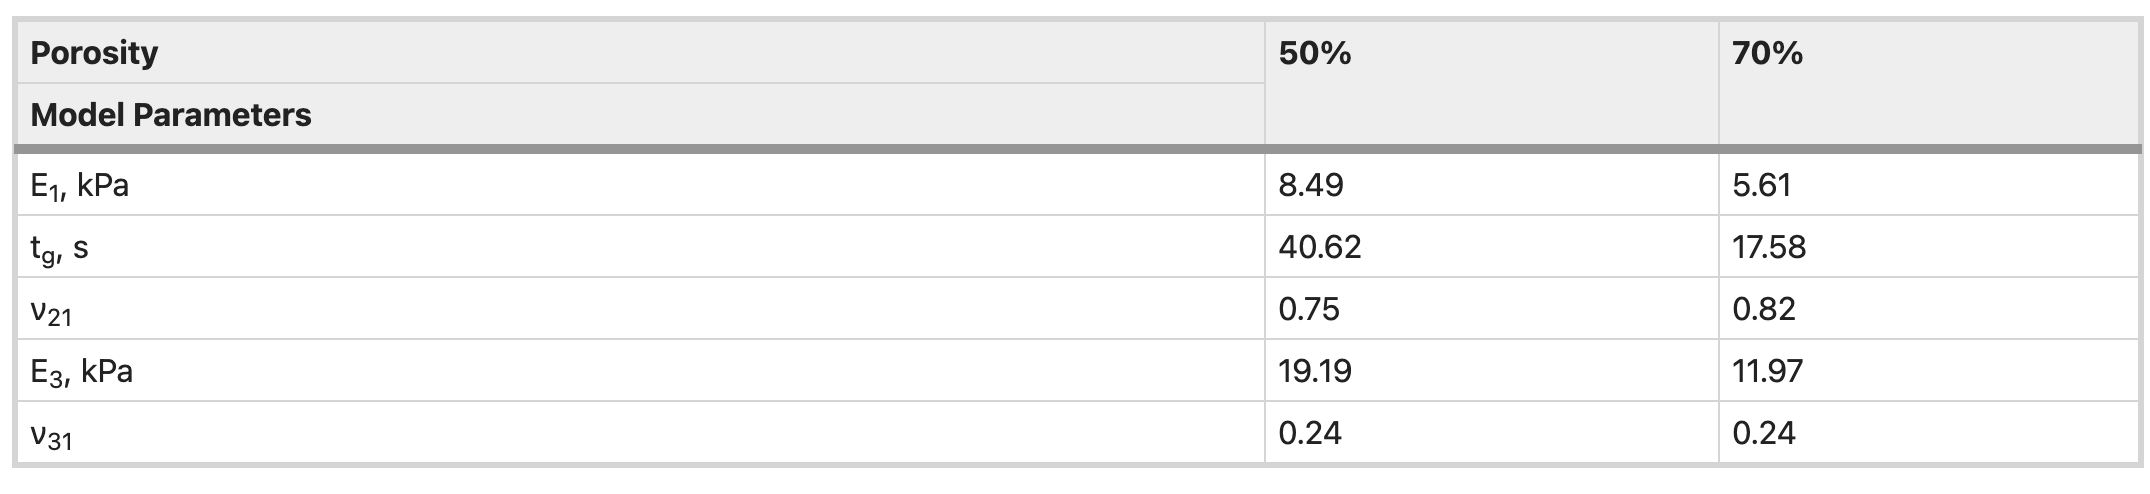

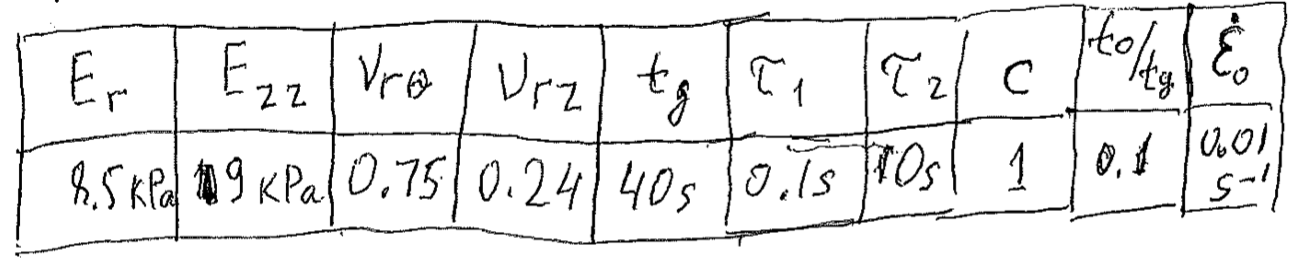

# Viscoporoelastic model inversion

Time taken in sec: 0.03571295738220215


/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:727: RuntimeWarning: invalid value encountered in multiply
  + f1\
/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:727: RuntimeWarning: invalid value encountered in true_divide
  + f1\
/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:730: RuntimeWarning: invalid value encountered in multiply
  /(2 * ( Ehat*I0(sqrt(f)) - I1(sqrt(f))/sqrt(f) ) ) \
/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computat

,Value,Category
t0/tg,0.10,Constant
strain_rate,0.01,Constant
Vrz,0.24,Constant
Ezz,19.19,Constant
c,1.00,FittedParam
tau1,0.10,FittedParam
tau2,10.00,FittedParam
tg,40.62,FittedParam
Vrtheta,0.75,FittedParam
Err,8.49,FittedParam


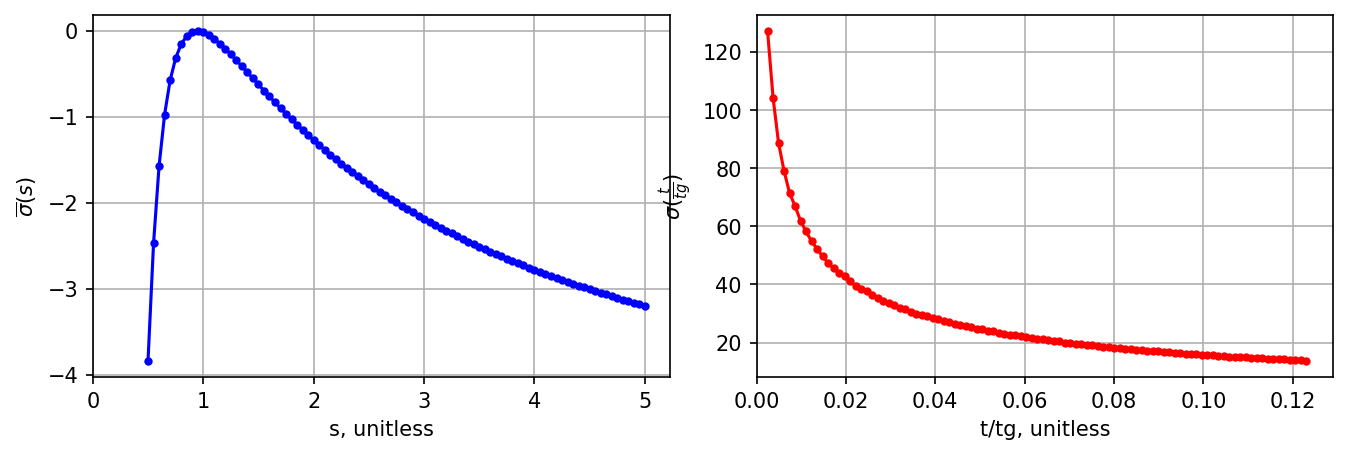

In [21]:
#@markdown Viscoporoelastic Model - Numerical Inversion

import time as timer

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)
from viscoporoelastic_model import ViscoporoelasticModel1

t1=timer.time();

#@markdown Predefined constants
ViscoporoelasticModel1.t0_tg = 0.1 #@param {type:"number"} ; # 10 percent
ViscoporoelasticModel1.strain_rate = 0.01 #@param {type:"number"} ; # 1 percent per s (normally 1#/s)
## Below are directly determined by the mesh deformation part of the
## experiment (see our paper with Daniel).  -Dr. Spector
ViscoporoelasticModel1.Vrz = 0.24 #@param {type:"number"} ; # Not actually v, but greek nu (represents Poisson's ratio)
ViscoporoelasticModel1.Ezz =   19.19 #@param {type:"number"} ; # Note- don't mix up Ezz with epszz

vpe = ViscoporoelasticModel1()
tg = vpe.tg

#@markdown Fitted parameters (to be determined by experimental fitting to the unknown material)
## Fitted parameters (to be determined by experimental fitting to
# the unknown material)
vpe.c =   1#@param {type:"number"} ;
vpe.tau1 =  0.1#@param {type:"number"} ;  # units = sec
vpe.tau2 =  10 #@param {type:"number"} ;  # units = sec
#tau = [tau1, tau2];
#tau = [1 1];
vpe.tg=40.62 #@param {type:"number"}; #in units of s   # for porosity_sp == 0.5
vpe.Vrtheta =  0.75#@param {type:"number"}; # Not actually v, but greek nu (represents Poisson's ratio)
vpe.Err =  8.49#@param {type:"number"};

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times = np.arange(0.05, 5.05, 0.05)
input_times = times
plot_times  = times/tg
func = vpe.laplace_value
func_name = {"t":r"$\sigma(\frac{t}{tg})$", "s":r"$\overline{\sigma}(s)$"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless"}
#func_name = {"t":r"$f'(\frac{t}{tg})$", "s":r"$\overline{F'}(s)$","t_anal":f"f'(t/tg), {vpe.inverted_value_units()}"}
#x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}

s_vals = np.arange(0.5, 5.05, 0.05)

import time as timer
t1=timer.time();
inverted_vals=euler_inversion(func, input_times/tg)
t2=timer.time()-t1
print("Time taken in sec:", t2)

#%%
# Non-positive s values give an error "invalid value encountered in sqrt"
laplace_vals = func(s_vals)

##%%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_figwidth(9)
fig.set_figheight(3)
fig.set_dpi(150)
fig.tight_layout() 

axs[0].plot(s_vals, laplace_vals, ".-b")
axs[0].set_xlabel(x_names["s"])
# theoretically, there should be no limit on s, but non-positive values throw an error in the function
axs[0].set_xlim([0, None])
axs[0].set_ylabel(func_name["s"])
axs[0].grid()

axs[1].plot(plot_times, inverted_vals, ".-r")
axs[1].set_xlabel(x_names["t"])
axs[1].set_xlim([0, None])
axs[1].set_ylabel(func_name["t"])    
axs[1].grid()

#axs[0].show()

fig.show()


x1=np.arange(10)
y1=np.random.random(10)
x2=np.arange(4,12)
y2=np.random.random(8)
df1 = pd.DataFrame({'Constant':vpe.get_predefined_constant_names(),'Value':vpe.get_predefined_constants()})
df2 = pd.DataFrame({'Fitted':vpe.get_fitted_parameter_names(),'Value':vpe.get_fitted_parameters()})
df3 = pd.DataFrame({'Value':vpe.get_predefined_constants()+vpe.get_fitted_parameters(),"Category":vpe.get_var_categories()}, index=vpe.get_predefined_constant_names()+vpe.get_fitted_parameter_names())
df3

/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:727: RuntimeWarning: invalid value encountered in multiply
  + f1\
/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:727: RuntimeWarning: invalid value encountered in true_divide
  + f1\
/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:730: RuntimeWarning: invalid value encountered in multiply
  /(2 * ( Ehat*I0(sqrt(f)) - I1(sqrt(f))/sqrt(f) ) ) \
/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computat

Time taken in sec: 0.03523707389831543


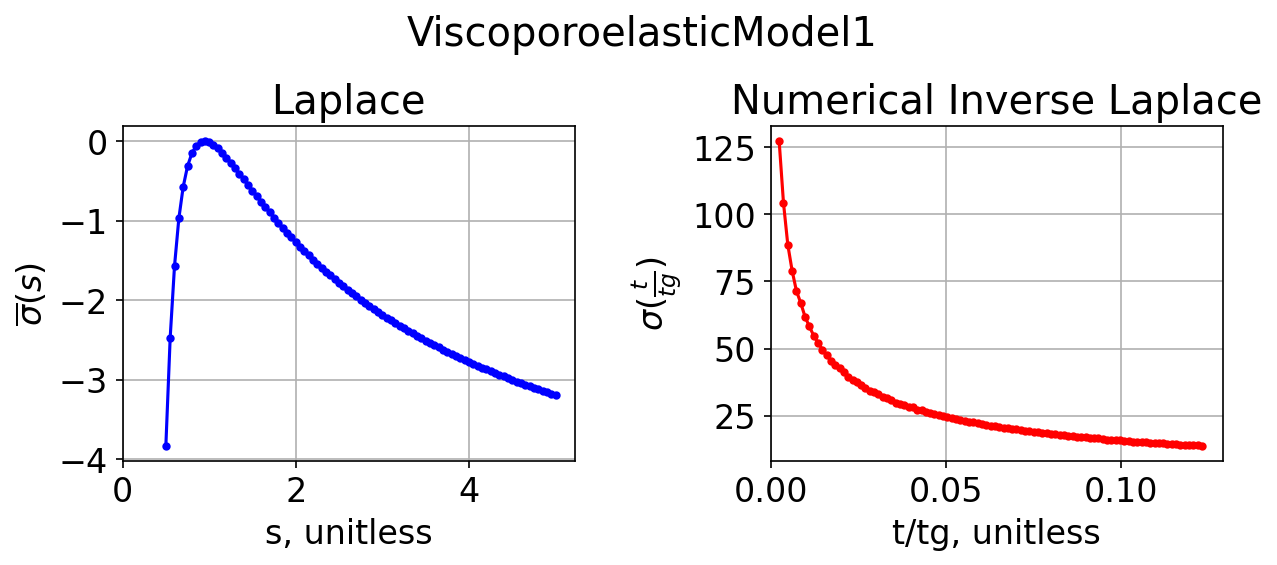

In [23]:
importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)
from viscoporoelastic_model import ViscoporoelasticModel1


#@markdown Predefined constants
ViscoporoelasticModel1.t0_tg = 0.1 #@param {type:"number"} ; # 10 percent
ViscoporoelasticModel1.strain_rate = 0.01 #@param {type:"number"} ; # 1 percent per s (normally 1#/s)
## Below are directly determined by the mesh deformation part of the
## experiment (see our paper with Daniel).  -Dr. Spector
ViscoporoelasticModel1.Vrz = 0.24 #@param {type:"number"} ; # Not actually v, but greek nu (represents Poisson's ratio)
ViscoporoelasticModel1.Ezz =   19.19 #@param {type:"number"} ; # Note- don't mix up Ezz with epszz

vpe = ViscoporoelasticModel1()
tg = vpe.tg

#@markdown Fitted parameters (to be determined by experimental fitting to the unknown material)
## Fitted parameters (to be determined by experimental fitting to
# the unknown material)
vpe.c =   1#@param {type:"number"} ;
vpe.tau1 =  0.1#@param {type:"number"} ;  # units = sec
vpe.tau2 =  10 #@param {type:"number"} ;  # units = sec
#tau = [tau1, tau2];
#tau = [1 1];
vpe.tg=40.62 #@param {type:"number"}; #in units of s   # for porosity_sp == 0.5
vpe.Vrtheta =  0.75#@param {type:"number"}; # Not actually v, but greek nu (represents Poisson's ratio)
vpe.Err =  8.49#@param {type:"number"};

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times = np.arange(0.05, 5.05, 0.05)
input_times = times
plot_times  = times/tg
func = vpe.laplace_value
func_name = {"t":r"$\sigma(\frac{t}{tg})$", "s":r"$\overline{\sigma}(s)$"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless"}
#func_name = {"t":r"$f'(\frac{t}{tg})$", "s":r"$\overline{F'}(s)$","t_anal":f"f'(t/tg), {vpe.inverted_value_units()}"}
#x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}

s_vals = np.arange(0.5, 5.05, 0.05)


plt.rc('font', size=16)  # default font size is 10
fig, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    func=func, func_name=func_name, x_names=x_names, s_vals=s_vals, 
    input_times=input_times, plot_times=plot_times, tg=tg, model_name = vpe.get_model_name())


# Laplace function relevant properties - for diagnosing errors
## Sources:
*   https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/LaplaceProps.html
*   https://lpsa.swarthmore.edu/LaplaceZTable/Common%20Laplace%20Transform%20Pairs.pdf

## Properties:  
1. Initial Value Theorem   
image.png

1. Final Value Theorem   
image.png

1. Time scaling.  
![image.png](https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/Funcs/imgB1.gif)

1. Multiplication by time.  
![image.png](https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/Funcs/imgAF.gif)